In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Univ1 = pd.read_excel("C:\\Users\\lebak\\Assignments\\Hiearchial clustering\\Practice\\University_Clustering.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lebak\\Assignments\\Hiearchial clustering\\Practice\\University_Clustering.xlsx'

In [49]:
Univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [50]:
Univ = Univ1.drop(["State"], axis =1)

In [51]:
Univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [52]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ KB


In [53]:
# normalization

def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [54]:
Univ_norm = norm(Univ.iloc[:,1:])

In [55]:
Univ_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [60]:
#screeplot or elbow plot
from sklearn.cluster import KMeans
TWSS = []
k = list(range(2,9))
for i in k:
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(Univ_norm)
    TWSS.append(Kmeans.inertia_)
TWSS
    

[4.123452442397181,
 2.9674741004843974,
 2.24094486741605,
 1.678132684074635,
 1.4758031742849498,
 1.2096210020429903,
 1.0512293109799342]

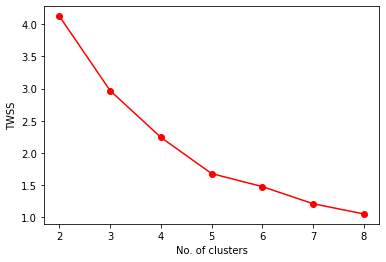

In [63]:
#plot the graph

plt.plot(k,TWSS,'ro-');plt.xlabel('No. of clusters'); plt.ylabel("TWSS")
plt.show()

In [65]:
# create the labels

model = KMeans(n_clusters = 4)
model.fit(Univ_norm)
model.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [70]:
cluster_labels = pd.Series(model.labels_)

In [71]:
Univ['clust'] = cluster_labels

In [73]:
Univ1 = Univ.iloc[:,[7,1,2,3,4,5,6]]

In [74]:
Univ1

,clust,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,1310,89,22,13,22704,94
1,3,1415,100,25,6,63575,81
2,0,1260,62,59,9,25026,72
3,2,1310,76,24,12,31510,88
4,0,1280,83,33,13,21864,90
5,2,1340,89,23,10,32162,95
6,2,1315,90,30,12,31585,95
7,0,1255,74,24,12,20126,92
8,2,1400,91,14,11,39525,97
9,3,1305,75,44,7,58691,87
